# m_cfd_of

Saang Bum Kim <br>
2020-09-21 08:30:46

In [1]:
%
%%  PART 0.     Opening
%
fclose all; close all
clc
clear all
tcomp = tic;
telap = toc(tcomp);

s_dir = 'git/openfoam_seo/of/org/';

seo_init

id_f = 1;
% id_sv = true;
id_sv = false;
% id_pl = true;
id_pl = false;

% id_jupyter = false;
id_jupyter = true;

No port asigned (no p_comsol) !

MATLAB is now connected to a COMSOL Multiphysics Server at localhost:2036

Run the commands below to access the COMSOL ModelUtil commands:
import com.comsol.model.util.*


In [1]:
clear sb

No port asigned (no p_comsol) !
No comsol mphserver running or already connected!


# Pre Process

In [2]:
s_angle_p = {'00','02','m2','04','m4','06','m6'};
angle_p   = [  0 ,  2 , -2 ,  4 , -4 ,  6 , -6];

In [4]:
id_angle = 5;

In [7]:
al = -angle_p(id_angle)*pi/180;
fprintf('Angle of attack: %d',(al*180/pi))
s_angle = s_angle_p(id_angle)

Angle of attack: 4
s_angle =

  1x1 cell array

    {'m4'}



## from CSL: YJN2, rib

In [2]:
cd ~/Work/git/openfoam_seo/wtt/yjn2/

In [6]:
load rib_upper_laminarTa_Re150.mat

In [3]:
model = mphload('rib_upper_laminar_Re150.mph')
% model = mphload('rid.mph')

Error using eval
Unrecognized function or variable 'mphload'.



In [4]:
% mphmesh(model)
% x = model.mesh("mesh1").getVertex();

Error using eval
Unrecognized function or variable 'model'.



In [6]:
[meshstats,meshdata] = mphmeshstats(model);

Error using eval
Unrecognized function or variable 'model'.



In [8]:
c_box1 = mpheval(model,'X','selection','box1')
c_box2 = mpheval(model,'X','selection','box2')
c_box3 = mpheval(model,'X','selection','box3')
try
c_box4 = mpheval(model,'X','selection','box4')
end

Error using eval
Unrecognized function or variable 'model'.



In [ ]:
% save imsi200921 x meshdata c_box1 c_box2 c_box3
% save imsi200922 meshdata c_box1 c_box2 c_box3 c_box4

### data load

In [7]:
whos -file imsi200921
load imsi200921

  Name          Size               Bytes  Class     Attributes

  c_box1        1x1                10868  struct              
  c_box2        1x1                 6044  struct              
  c_box3        1x1                 6044  struct              
  meshdata      1x1               432478  struct              
  x             2x9868            157888  double              



In [3]:
whos -file imsi200922
load imsi200922

  Name          Size            Bytes  Class     Attributes

  c_box1        1x1              1536  struct              
  c_box2        1x1              1536  struct              
  c_box3        1x1              1536  struct              
  c_box4        1x1              1536  struct              
  meshdata      1x1              7962  struct              



In [11]:
c_box1
c_box1.d1(1:3)
c_box1.p(:,1:3)
c_box1.t(:,1:3)
c_box1.ve(1:3,:)


c_box1 = 

  struct with fields:

    expr: {'X'}
      d1: [1x268 double]
       p: [2x268 double]
       t: [2x268 int32]
      ve: [268x1 int32]
    unit: {'m'}


ans =

   -0.0668   -0.0668   -0.0405


ans =

   -0.0668   -0.0668   -0.0405
    0.0004   -0.0000   -0.0036


ans =

  2x3 int32 matrix

   0   2   4
   1   3   2


ans =

  3x1 int32 column vector

   1
   1
   2



### c_box

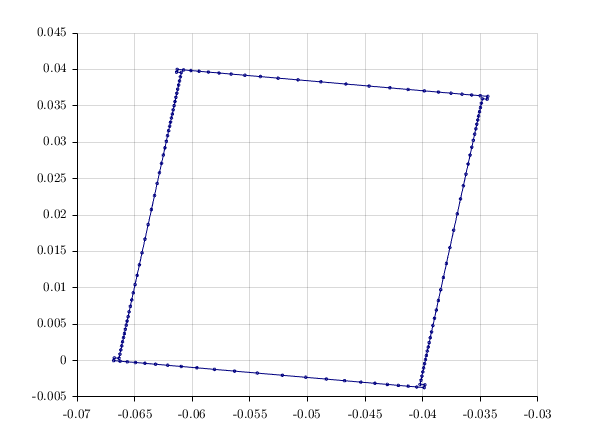

In [8]:
id_pause = true;
figure(1)
for ii=1:size(c_box2.t,2)
    id = c_box2.t(:,ii)+1;
    x_id = c_box2.p(:,id);
% plot(c_box1.p(1,ii),c_box1.p(2,ii),'o','MarkerSize',6-4)
plot(x_id(1,:),x_id(2,:),'-o','MarkerSize',6-4,'Color',rgb('Navy'))
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end
% figure(2)
% plot(c_box2.ve)

### sb

In [ ]:
sb.v.n = size(meshdata.vertex,2);
sb.v.x = meshdata.vertex;
sb.b4.n = size(meshdata.elem{2},2);
sb.b4.id = meshdata.elem{2}+1;
sb.b3.n = size(meshdata.elem{3},2);
sb.b3.id = meshdata.elem{3}+1;

### triangular

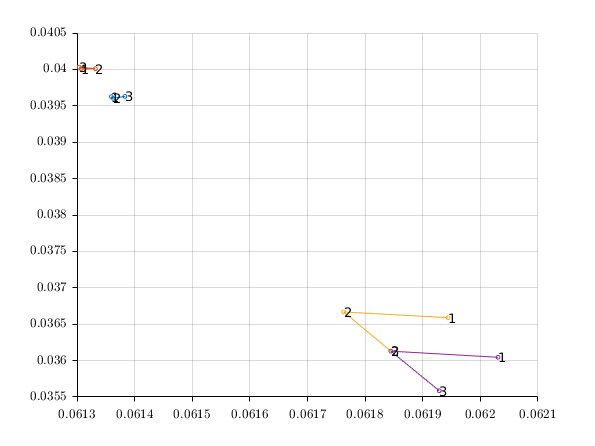

In [12]:
i_34 = 'b3';
% i_34 = 'b4';
id_pause = true;
figure(1)
clf
% for ii=1:sb.(i_34).n
% for ii=1:2^0
for ii=1:2^2
% for ii=1:2^4
    plot(sb.v.x(1,sb.(i_34).id(:,ii)), sb.v.x(2,sb.(i_34).id(:,ii)), '-o', 'MarkerSize', 6-3)
    for jj=1:length(sb.(i_34).id(:,ii))
        text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end

### quad

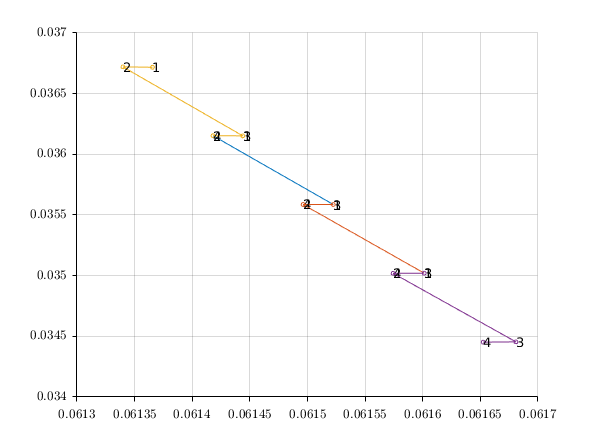

In [13]:
% i_34 = 'b3';
i_34 = 'b4';
id_pause = true;
figure(1)
clf
% for ii=1:sb.(i_34).n
% for ii=1:2^0
for ii=1:2^2
% for ii=1:2^4
    plot(sb.v.x(1,sb.(i_34).id(:,ii)), sb.v.x(2,sb.(i_34).id(:,ii)), '-o', 'MarkerSize', 6-3)
    for jj=1:length(sb.(i_34).id(:,ii))
        text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end

### Whole

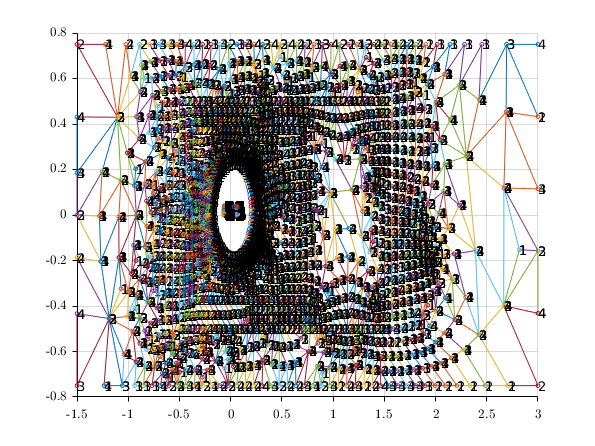

In [19]:
% i_34 = 'b3';
i_34 = 'b4';
id_pause = true;
figure(1)
clf
for ii=1:sb.(i_34).n
% for ii=1:2^0
% for ii=1:2^2
% for ii=1:2^10
    plot(sb.v.x(1,sb.(i_34).id(:,ii)), sb.v.x(2,sb.(i_34).id(:,ii)), '-o', 'MarkerSize', 6-3)
    for jj=1:length(sb.(i_34).id(:,ii))
        text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end
i_34 = 'b3';
% for ii=1:2^2
for ii=1:2^8
    plot(sb.v.x(1,sb.(i_34).id(:,ii)), sb.v.x(2,sb.(i_34).id(:,ii)), '-o', 'MarkerSize', 6-3)
    for jj=1:length(sb.(i_34).id(:,ii))
        text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    end
%     if id_pause
%         gcfG;gcfH;gcfLFont;gcfS;%gcfP
%         id_pause = false;
%     end
end

### openFoam

In [ ]:
fid = fopen(sprintf('blockMeshDict_%s.foam',datestr(now,'yymmdd')),'w+');

fprintf(fid,'/*--------------------------------*- C++ -*----------------------------------*\\\n');
fprintf(fid,'| =========                 |                                                 |\n');
fprintf(fid,'| \\\\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |\n');
fprintf(fid,'|   \\\\  /    O peration     | Web:      https://www.OpenFOAM.org              |\n');
fprintf(fid,'|  \\\\    /   A nd           | Version:  8                                     |\n');
fprintf(fid,'|    \\\\/     M anipulation  |                                                 |\n');
fprintf(fid,'\\*---------------------------------------------------------------------------*/\n');
fprintf(fid,'FoamFile\n');
fprintf(fid,'{\n');
fprintf(fid,'    version     2.0;\n');
fprintf(fid,'    format      ascii;\n');
fprintf(fid,'    class       dictionary;\n');
fprintf(fid,'    object      blockMeshDict;\n');
fprintf(fid,'}\n');
fprintf(fid,'// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //\n');
fprintf(fid,'\n');
fprintf(fid,'convertToMeters 1;\n');
fprintf(fid,'\n');
fprintf(fid,'vertices\n');
fprintf(fid,'(\n');

% for ii=1:size(meshdata.vertex,2)
for ii=1:2^4
    fprintf(fid,'(%f %f 0)\n',meshdata.vertex(:,ii) );
    % fprintf(fid,'(%.56f %.56f)\n',meshdata.vertex(:,ii) );
end

for ii=1:2^4
    fprintf(fid,'(%f %f 1)\n',meshdata.vertex(:,ii) );
    % fprintf(fid,'(%.56f %.56f)\n',meshdata.vertex(:,ii) );
end

% fprintf(fid,'vertices #codeStream\n');
% fprintf(fid,'{\n');
% fprintf(fid,'    codeInclude\n');
% fprintf(fid,'    #{\n');
% fprintf(fid,'        #include "pointField.H"\n');
% fprintf(fid,'    #};\n');
% fprintf(fid,'\n');
% fprintf(fid,'    code\n');
% fprintf(fid,'    #{\n');
% fprintf(fid,'        pointField points(%d);\n'%int(np.shape(of_xyz)[1]/2));
% % for ii in range(len(of_xyz[0])):
% for ii in range(int(np.shape(of_xyz)[1]/2)):
%     fprintf(fid,'        points[%d] = point(%f, %f, %f);\n'%(ii,of_xyz[0][ii],of_xyz[1][ii],of_xyz[2][ii]));
% fprintf(fid,'\n');
% fprintf(fid,'        // Duplicate z points\n');
% fprintf(fid,'        label sz = points.size();\n');
% fprintf(fid,'        points.setSize(2*sz);\n');
% fprintf(fid,'        for (label i = 0; i < sz; i++)\n');
% fprintf(fid,'        {\n');
% fprintf(fid,'            const point& pt = points[i];\n');
% fprintf(fid,'            points[i+sz] = point(pt.x(), pt.y(), -pt.z());\n');
% % fprintf(fid,'            points[i+sz] = point(pt.x(), pt.y(), 1);\n');
% fprintf(fid,'        }\n');
% fprintf(fid,'\n');
% fprintf(fid,'        os << points;\n');
% fprintf(fid,'    #};\n');
% fprintf(fid,'};\n');

fprintf(fid,');\n');
fprintf(fid,'\n');
fprintf(fid,'blocks\n');
fprintf(fid,'(\n');
% fprintf(fid,'    hex (0 1 2 3 4 5 6 7) (20 20 1) simpleGrading (1 1 1)\n');




# Main Process

# Post Process

# FINE